In [ ]:
from IPython.display import clear_output
!pip install imutils
clear_output()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import scipy
!pip install colorama
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm import tqdm, tqdm_notebook
from colorama import Fore
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
import time
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb

from tqdm import tqdm
import shutil
import itertools
import datetime

import imutils
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications import *
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint,TensorBoard
from keras.losses import *

init_notebook_mode(connected=True)
RANDOM_SEED = 42

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"niranjan186","key":"eb67d469cb2420b43fc4ee18583b7d5e"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

 94% 139M/149M [00:01<00:00, 126MB/s]
100% 149M/149M [00:01<00:00, 148MB/s]


In [ ]:
!unzip /content/brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
base_dir = "/content/brain-tumor-mri-dataset"

In [ ]:
test_dir = f'{base_dir}/Testing'
train_dir = f"{base_dir}/Training"

train_glioma_tumor_dir = f'{train_dir}/glioma_tumor'
train_meningioma_tumor_dir = f'{train_dir}/meningioma_tumor'
train_no_tumor_dir = fr'{train_dir}/o_tumor'
train_pituitary_tumor_dir = f'{train_dir}/ituitary_tumor'


test_glioma_tumor_dir = f'{test_dir}/lioma_tumor'
test_meningioma_tumor_dir = f'{test_dir}/eningioma_tumor'
test_no_tumor_dir = fr"{test_dir}/o_tumor"
test_pituitary_tumor_dir = f'{test_dir}/ituitary_tumor'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

labels = ['glioma','notumor','meningioma','pituitary']
X_train = []
y_train = []
X_test = [] # testing images.
y_test = []

image_size = 224
for i in labels:
    folderPath = f"{train_dir}/{i}"
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = f"{test_dir}/{i}"
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)

X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

print(X_train.shape)
print(X_test.shape)

100%|██████████| 300/300 [00:00<00:00, 454.51it/s]


(5712, 224, 224, 3)
(1311, 224, 224, 3)


In [ ]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor: {}'.format(labels_dict[index]))
        plt.show()

In [ ]:
IMG_SIZE=(224,224)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(572, 224, 224, 3)
(5140, 224, 224, 3)
(5140, 4)
(572, 4)


In [ ]:
plot_samples(X_train, y_train, labels, 30)

pre-processing

In [ ]:
def preprocess_imgs(set_name, img_size):
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)


In [ ]:
X_train_prep = preprocess_imgs(set_name=X_train, img_size=IMG_SIZE)

In [ ]:
X_test_prep = preprocess_imgs(set_name=X_test, img_size=IMG_SIZE)

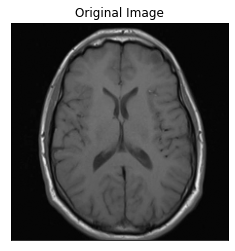

<Figure size 1080x432 with 0 Axes>

In [ ]:
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)
os.mkdir('preview12')
x = X_train[0]
x = x.reshape((1,) + x.shape)

i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break

plt.imshow(X_train[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()
plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview12/'):
    img = cv2.imread('preview12/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augemented Images')
plt.show()

In [ ]:
X_train.shape

(6320, 224, 224, 3)

In [ ]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.99):
            self.model.stop_training = True

In [ ]:
callback = myCallbacks()

datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)

datagen_val = ImageDataGenerator(rescale=1./255)

In [ ]:

%load_ext tensorboard
class_names = list(labels)
def plot_to_image(figure):
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(figure)
    buf.seek(0)

    digit = tf.image.decode_png(buf.getvalue(), channels=4)
    digit = tf.expand_dims(digit, 0)

    return digit

In [ ]:
def plot_confusion_matrix(cm, class_names):
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    threshold = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return figure

***VGG19***

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
pre_trained_model = VGG19(input_shape=(224,224,3), include_top=False, weights="imagenet")
#pre_trained_model.trainable = False

for layer in pre_trained_model.layers[:19]:
    layer.trainable = False

model1 = Sequential([
    pre_trained_model,
    MaxPool2D((2,2) , strides = 2),
    Flatten(),
    Dense(4 , activation='softmax')])
model1.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy','AUC'])
model1.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 512)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 4)                 18436     
                                                                 
Total params: 20,042,820
Trainable params: 4,738,052
Non-trainable params: 15,304,768
_________________________________________________________________


In [ ]:
!rm -fr logs
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [ ]:
%tensorboard --logdir logs

In [ ]:
file_writer_cm = tf.summary.create_file_writer(logdir)
tensorboard = TensorBoard(logdir, histogram_freq=1)


In [ ]:
hist1 = model1.fit(
    datagen.flow(X_train,y_train, batch_size=16),
    epochs=15,
    validation_data=datagen_val.flow(X_test,y_test),
    steps_per_epoch = len(X_train) / 16 ,
    callbacks=[callback]
)
hist1

Epoch 1/15
100/239 [===========>..................] - ETA: 21s - loss: 1.4152 - accuracy: 0.2381 - auc: 0.4940

KeyboardInterrupt: ignored

In [ ]:
import gc
gc.collect()

80366

In [ ]:
pred = model1.predict(X_train_prep)

198/198 [==============================] - 5s 27ms/step


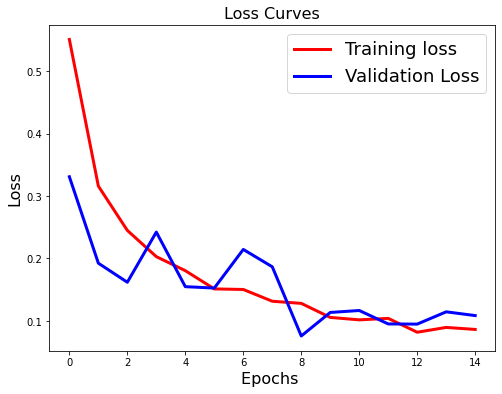

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(hist1.history['loss'],'r',linewidth=3.0)
plt.plot(hist1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

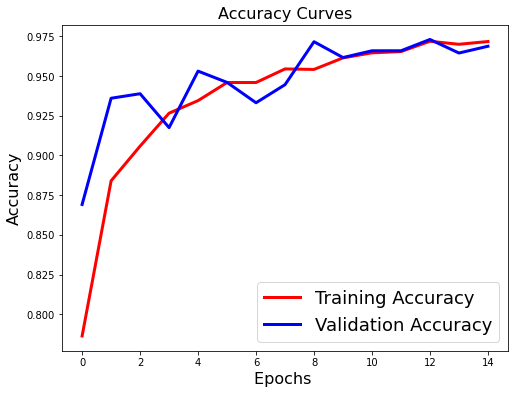

In [ ]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(hist1.history['accuracy'],'r',linewidth=3.0)
plt.plot(hist1.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

In [ ]:
def log_confusion_matrix(epoch, logs):
    predictions = np.argmax(model1.predict(x_test), axis=1)
    cm = confusion_matrix(np.argmax(y_test,axis=1), predictions)
    figure = plot_confusion_matrix(cm, class_names=class_names)
    cm_image = plot_to_image(figure)

    with file_writer_cm.as_default():
        tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Remove previous log folder
!rm -fr logs
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

22/22 [==============================] - 1s 24ms/step
              precision    recall  f1-score   support

           0       1.00      0.06      0.11       162
           1       0.36      0.99      0.53       199
           2       0.63      0.55      0.59       164
           3       1.00      0.01      0.01       178

    accuracy                           0.42       703
   macro avg       0.75      0.40      0.31       703
weighted avg       0.73      0.42      0.31       703



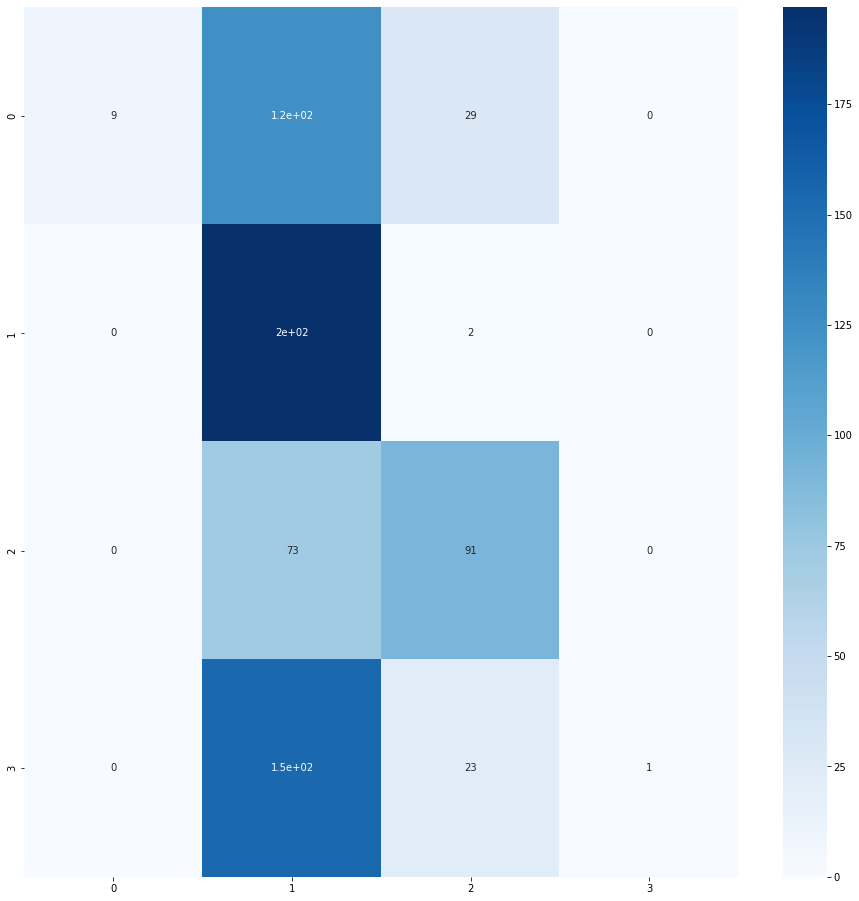

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
predicted_classes = np.argmax(model1.predict(X_test), axis = 1)
confusionmatrix = confusion_matrix(np.argmax(y_test,axis=1), predicted_classes)
plt.figure(figsize = (16, 16))
sns.heatmap(confusionmatrix, cmap = 'Blues', annot = True, cbar = True)
print(classification_report(np.argmax(y_test,axis=1), predicted_classes))

In [ ]:
loss,acc = model1.evaluate(X_test,y_test)

***RESNET50***

***RESNET101***


In [ ]:
from keras.applications import ResNet101V2
reslayer=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in reslayer.layers:
    layer.trainable=False

171317808/171317808 [==============================] - 1s 0us/step


In [ ]:
res=Sequential()
res.add(reslayer)
res.add(Dropout(0.5))
res.add(Flatten())
res.add(BatchNormalization())
res.add(Dense(2048,kernel_initializer='he_uniform'))
res.add(BatchNormalization())
res.add(Activation('relu'))
res.add(Dropout(0.5))
res.add(Dense(1024,kernel_initializer='he_uniform'))
res.add(BatchNormalization())
res.add(Activation('relu'))
res.add(Dropout(0.5))
res.add(Dense(4,activation='softmax'))
print(res.summary())

res.compile(optimizer = Adam(lr = 0.0001) , loss = 'categorical_crossentropy' , metrics = ['accuracy','AUC'])
res.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 7, 7, 2048)        42626560  
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 2048)        0         
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_6 (Batc  (None, 100352)           401408    
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 2048)              205522944 
                                                                 
 batch_normalization_7 (Batc  (None, 2048)             8192      
 hNormalization)                                      

In [ ]:
res.fit(
    datagen.flow(X_train,y_train, batch_size=32),
    epochs=20,
    validation_data=datagen_val.flow(X_test,y_test),
    steps_per_epoch = len(X_train) / 32 ,
    callbacks=[callback]
)

Epoch 1/20
197/197 [==============================] - 70s 320ms/step - loss: 0.5554 - accuracy: 0.8068 - auc: 0.9515 - val_loss: 0.3214 - val_accuracy: 0.9203 - val_auc: 0.9823
Epoch 2/20
197/197 [==============================] - 61s 309ms/step - loss: 0.3029 - accuracy: 0.8886 - auc: 0.9827 - val_loss: 0.1591 - val_accuracy: 0.9516 - val_auc: 0.9926
Epoch 3/20
197/197 [==============================] - 61s 307ms/step - loss: 0.2387 - accuracy: 0.9172 - auc: 0.9885 - val_loss: 0.1835 - val_accuracy: 0.9516 - val_auc: 0.9918
Epoch 4/20
197/197 [==============================] - 61s 308ms/step - loss: 0.1789 - accuracy: 0.9337 - auc: 0.9933 - val_loss: 0.1576 - val_accuracy: 0.9587 - val_auc: 0.9934
Epoch 5/20
197/197 [==============================] - 61s 308ms/step - loss: 0.1645 - accuracy: 0.9364 - auc: 0.9943 - val_loss: 0.1965 - val_accuracy: 0.9488 - val_auc: 0.9913
Epoch 6/20
197/197 [==============================] - 61s 309ms/step - loss: 0.1450 - accuracy: 0.9460 - auc: 0.995

***EFFICIENT NET ***

In [ ]:
base_model=tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights="imagenet",input_shape=(224,224,3), pooling='max')

16705208/16705208 [==============================] - 1s 0us/step


In [ ]:
BATCH_SIZE=64
TARGET_SIZE=224 # Based on EfficientNetB3
NUM_CLASSES=4

In [ ]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import models, layers

In [ ]:
for efflayer in eff_pre_train.layers[:237]:
    efflayer.trainable = False

In [ ]:
def create_model():
    conv_base = EfficientNetB3(include_top = False, weights = "imagenet", drop_connect_rate=0.6,
                               input_shape = (TARGET_SIZE, TARGET_SIZE, 3))
    model = conv_base.output
    model = layers.GlobalAveragePooling2D()(model)
    model = layers.Dense(NUM_CLASSES, activation = "softmax")(model)
    model = models.Model(conv_base.input, model)

    model.compile(optimizer = Adam(lr = 0.001),
                  loss = "sparse_categorical_crossentropy",
                  metrics = ["accuracy"])
    return model
model3 = create_model()
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                              

In [ ]:
model3.fit(
    datagen.flow(X_train,y_train, batch_size=32),
    epochs=20,
    validation_data=datagen_val.flow(X_test,y_test),
    steps_per_epoch = len(X_train) / 32 ,
    callbacks=[callback]
)

***INCEPTIONV3***

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
incV3 = InceptionV3(input_shape = (224,224,3), include_top = False, weights = 'imagenet', pooling = 'avg')

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in incV3.layers:
  layer.trainable = False

In [ ]:
x = incV3.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation = 'relu')(x)
predictions = layers.Dense(4,activation = 'softmax')(x)
incv3mod = Model(inputs = incV3.input, outputs = predictions)
incv3mod.summary()
incv3mod.compile(optimizer = Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy','AUC'])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 rmalization)                   )                                                           

In [ ]:
incv3mod.fit(
    datagen.flow(X_train,y_train, batch_size=32),
    epochs=20,
    validation_data=datagen_val.flow(X_test,y_test),
    steps_per_epoch = len(X_train) / 32 ,
    callbacks=[callback]
)

Epoch 1/20
197/197 [==============================] - 91s 360ms/step - loss: 0.7636 - accuracy: 0.8214 - auc: 0.9478 - val_loss: 0.3312 - val_accuracy: 0.8748 - val_auc: 0.9810
Epoch 2/20
197/197 [==============================] - 66s 336ms/step - loss: 0.3438 - accuracy: 0.8889 - auc: 0.9802 - val_loss: 0.2192 - val_accuracy: 0.9104 - val_auc: 0.9904
Epoch 3/20
197/197 [==============================] - 67s 341ms/step - loss: 0.2522 - accuracy: 0.9101 - auc: 0.9883 - val_loss: 0.2302 - val_accuracy: 0.9275 - val_auc: 0.9895
Epoch 4/20
197/197 [==============================] - 67s 338ms/step - loss: 0.2246 - accuracy: 0.9245 - auc: 0.9899 - val_loss: 0.2235 - val_accuracy: 0.9331 - val_auc: 0.9867
Epoch 5/20
197/197 [==============================] - 67s 338ms/step - loss: 0.1870 - accuracy: 0.9350 - auc: 0.9924 - val_loss: 0.1663 - val_accuracy: 0.9459 - val_auc: 0.9942
Epoch 6/20
197/197 [==============================] - 66s 336ms/step - loss: 0.1842 - accuracy: 0.9354 - auc: 0.992